<a href="https://colab.research.google.com/github/ommishra0707/Bike_Sharing_Demand_Prediction/blob/main/Mishra_om_Bike_Sharing_Demand_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Seoul Bike Sharing Demand Prediction </u></b>

## <b> Problem Description </b>

### Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.


## <b> Data Description </b>

### <b> The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.</b>


### <b>Attribute Information: </b>

* ### Date : year-month-day
* ### Rented Bike count - Count of bikes rented at each hour
* ### Hour - Hour of he day
* ### Temperature-Temperature in Celsius
* ### Humidity - %
* ### Windspeed - m/s
* ### Visibility - 10m
* ### Dew point temperature - Celsius
* ### Solar radiation - MJ/m2
* ### Rainfall - mm
* ### Snowfall - cm
* ### Seasons - Winter, Spring, Summer, Autumn
* ### Holiday - Holiday/No holiday
* ### Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)

In [1]:
# Importing the libraries
import numpy as np
import pandas as pd
from numpy import math

from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PowerTransformer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

from scipy.stats import zscore

import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.outliers_influence import variance_inflation_factor

import seaborn as sns
import matplotlib.style as style
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
path = '/content/drive/MyDrive/Copy of SeoulBikeData.csv'
seoul_df = pd.read_csv(path,encoding= 'unicode_escape')

In [4]:
print(seoul_df.shape)

(8760, 14)


In [5]:
seoul_df.head(10)

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.00,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.00,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.00,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.00,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.00,0.0,0.0,Winter,No Holiday,Yes
5,01/12/2017,100,5,-6.4,37,1.5,2000,-18.7,0.00,0.0,0.0,Winter,No Holiday,Yes
6,01/12/2017,181,6,-6.6,35,1.3,2000,-19.5,0.00,0.0,0.0,Winter,No Holiday,Yes
7,01/12/2017,460,7,-7.4,38,0.9,2000,-19.3,0.00,0.0,0.0,Winter,No Holiday,Yes
8,01/12/2017,930,8,-7.6,37,1.1,2000,-19.8,0.01,0.0,0.0,Winter,No Holiday,Yes
9,01/12/2017,490,9,-6.5,27,0.5,1928,-22.4,0.23,0.0,0.0,Winter,No Holiday,Yes


In [6]:
seoul_df.tail(10)

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
8750,30/11/2018,761,14,7.8,20,2.2,2000,-13.8,1.67,0.0,0.0,Autumn,No Holiday,Yes
8751,30/11/2018,768,15,7.0,20,3.3,1994,-14.4,1.21,0.0,0.0,Autumn,No Holiday,Yes
8752,30/11/2018,837,16,7.2,23,1.5,1945,-12.6,0.72,0.0,0.0,Autumn,No Holiday,Yes
8753,30/11/2018,1047,17,6.0,29,2.1,1877,-10.7,0.23,0.0,0.0,Autumn,No Holiday,Yes
8754,30/11/2018,1384,18,4.7,34,1.9,1661,-9.8,0.00,0.0,0.0,Autumn,No Holiday,Yes
8755,30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.00,0.0,0.0,Autumn,No Holiday,Yes
8756,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.00,0.0,0.0,Autumn,No Holiday,Yes
8757,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.00,0.0,0.0,Autumn,No Holiday,Yes
8758,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.00,0.0,0.0,Autumn,No Holiday,Yes
8759,30/11/2018,584,23,1.9,43,1.3,1909,-9.3,0.00,0.0,0.0,Autumn,No Holiday,Yes


In [7]:
seoul_df.describe()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068
std,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000
25%,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000
75%,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000


In [8]:
seoul_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

In [9]:
count_of_null_values = seoul_df.isnull().sum()
count_of_null_values

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

In [10]:
value=len(seoul_df[seoul_df.duplicated()])
print("Total no. of duplicated values = ",value)

Total no. of duplicated values =  0


In [11]:
seoul_df.nunique().sort_values()

Holiday                         2
Functioning Day                 2
Seasons                         4
Hour                           24
Snowfall (cm)                  51
Rainfall(mm)                   61
Wind speed (m/s)               65
Humidity(%)                    90
Solar Radiation (MJ/m2)       345
Date                          365
Temperature(°C)               546
Dew point temperature(°C)     556
Visibility (10m)             1789
Rented Bike Count            2166
dtype: int64

In [12]:
seoul_df['Hour'] = seoul_df['Hour'].astype('category')

In [13]:
from datetime import datetime
import datetime as dt

In [14]:
seoul_df['Date'] = seoul_df['Date'].apply(lambda x: dt.datetime.strptime(x,"%d/%m/%Y"))

In [15]:
seoul_df['year'] = seoul_df['Date'].dt.year
seoul_df['month'] = seoul_df['Date'].dt.month
seoul_df['day'] = seoul_df['Date'].dt.day_name()

In [16]:
seoul_df['weekdays_weekend']=seoul_df['day'].apply(lambda x : 1 if x=='Saturday' or x=='Sunday' else 0 )
df=seoul_df.drop(columns=['Date','day','year'],axis=1)

In [17]:
seoul_df.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day', 'year', 'month', 'day',
       'weekdays_weekend'],
      dtype='object')

In [18]:
seoul_df.nunique()

Date                          365
Rented Bike Count            2166
Hour                           24
Temperature(°C)               546
Humidity(%)                    90
Wind speed (m/s)               65
Visibility (10m)             1789
Dew point temperature(°C)     556
Solar Radiation (MJ/m2)       345
Rainfall(mm)                   61
Snowfall (cm)                  51
Seasons                         4
Holiday                         2
Functioning Day                 2
year                            2
month                          12
day                             7
weekdays_weekend                2
dtype: int64

In [19]:
seoul_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Date                       8760 non-null   datetime64[ns]
 1   Rented Bike Count          8760 non-null   int64         
 2   Hour                       8760 non-null   category      
 3   Temperature(°C)            8760 non-null   float64       
 4   Humidity(%)                8760 non-null   int64         
 5   Wind speed (m/s)           8760 non-null   float64       
 6   Visibility (10m)           8760 non-null   int64         
 7   Dew point temperature(°C)  8760 non-null   float64       
 8   Solar Radiation (MJ/m2)    8760 non-null   float64       
 9   Rainfall(mm)               8760 non-null   float64       
 10  Snowfall (cm)              8760 non-null   float64       
 11  Seasons                    8760 non-null   object        
 12  Holida

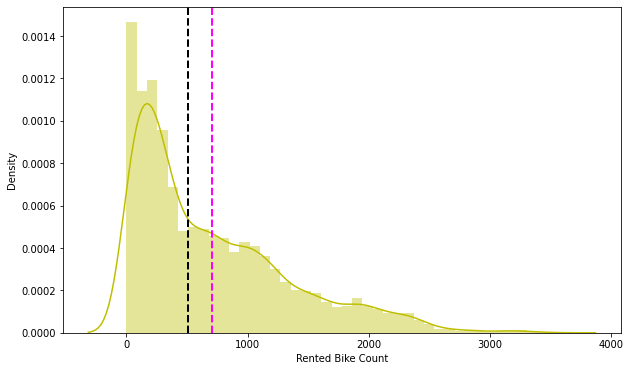

In [20]:
plt.figure(figsize=(10,6))
plt.xlabel('Rented Bike Count')
plt.ylabel('Density')
ax=sns.distplot(df['Rented Bike Count'],hist=True ,color="y")
ax.axvline(df['Rented Bike Count'].mean(), color='magenta', linestyle='dashed', linewidth=2)
ax.axvline(df['Rented Bike Count'].median(), color='black', linestyle='dashed', linewidth=2)
plt.show()

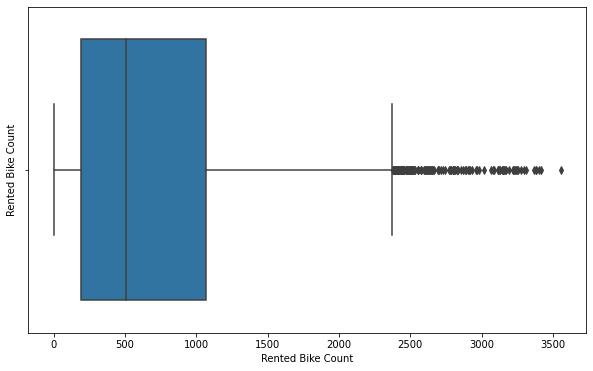

In [21]:
plt.figure(figsize=(10,6))
plt.ylabel('Rented Bike Count')
sns.boxplot(x=df['Rented Bike Count'])
plt.show()

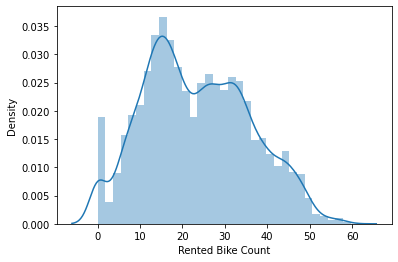

In [22]:
sns.distplot(np.sqrt(seoul_df['Rented Bike Count']))

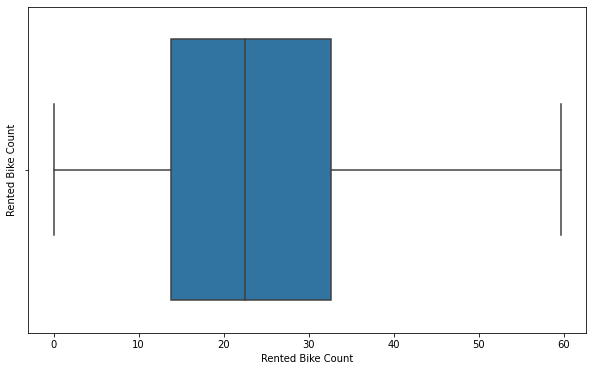

In [23]:
plt.figure(figsize=(10,6))

plt.ylabel('Rented Bike Count')
sns.boxplot(x=np.sqrt(df['Rented Bike Count']))
plt.show()

Text(0, 0.5, 'Rented Bike Count')

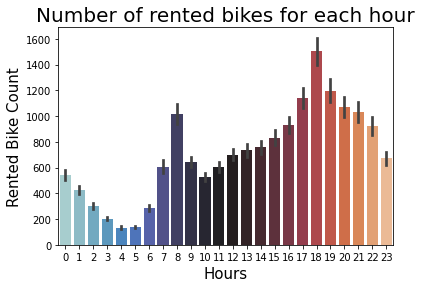

In [24]:
# setting seaborn plotting aesthetics for creating a bar chart
sns.barplot(
    x = seoul_df['Hour'],
    y = seoul_df['Rented Bike Count'],
    palette = ('icefire')
)
plt.title('Number of rented bikes for each hour', fontsize = 20)
plt.xlabel('Hours', fontsize = 15)
plt.ylabel('Rented Bike Count', fontsize = 15)

Inference:

From the above graph, we can see that the bikes are in high demand in the evening with a peak time at 6 pm.
The demand is high at 8 am in the morning as well.

[Text(0.5, 1.0, 'Count acording to Seasons ')]

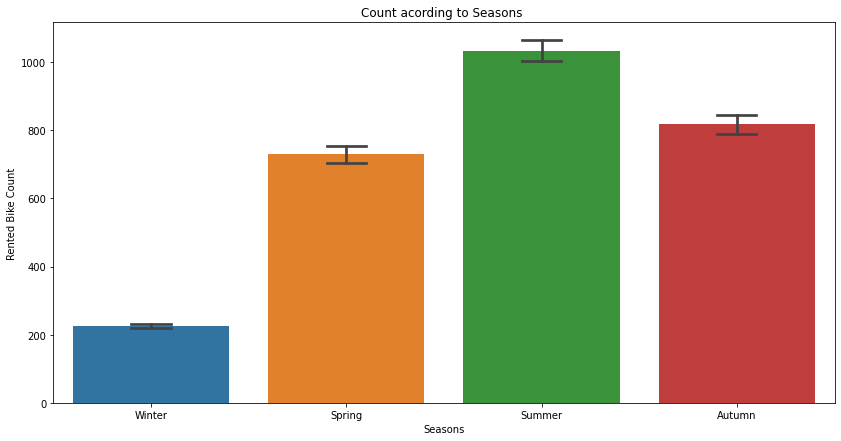

In [25]:
fig,ax=plt.subplots(figsize=(14,7))
sns.barplot(data= df,x='Seasons',y='Rented Bike Count',ax=ax,capsize=.2)
ax.set(title='Count acording to Seasons ')

[Text(0.5, 1.0, 'Count acording to seasons')]

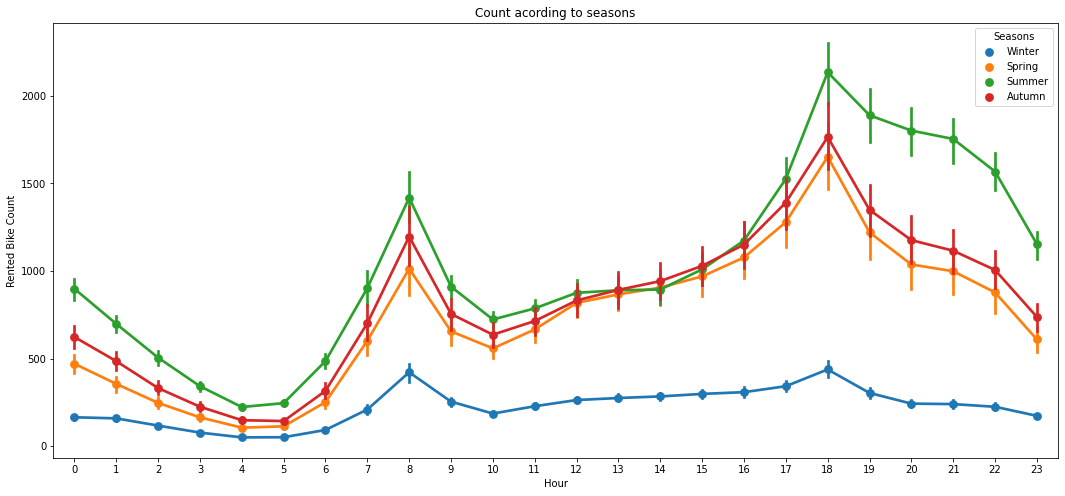

In [26]:
fig,ax=plt.subplots(figsize=(18,8))
sns.pointplot(data=df,x='Hour',y='Rented Bike Count',hue='Seasons',ax=ax)
ax.set(title='Count acording to seasons')

From the above plot, we can see that

The demand for rented bikes for all the seasons except winter is high during the evening specifically at 6 pm.
The demand for rented bikes is high in summers and low in winters.


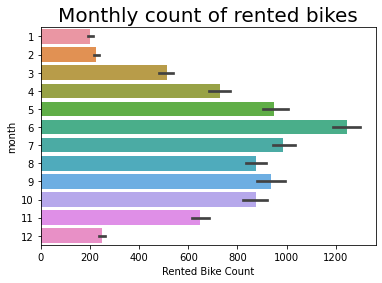

In [27]:
# plotting the row graph
sns.barplot(y='month',x='Rented Bike Count',data=seoul_df,orient='h')
plt.title('Monthly count of rented bikes', fontsize = 20)
plt.show()



*   During June month, the demand for bikes is high followed by July and May.


*  Demand is lowest in December, January and February



Text(0.5, 1.0, 'Count of Rented bikes according to weekdays and weekends')

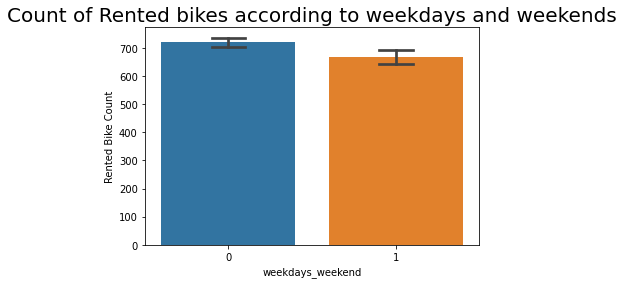

In [28]:
# plotting the bar graph
sns.barplot(data=seoul_df,x='weekdays_weekend',y='Rented Bike Count',capsize=.2)
plt.title('Count of Rented bikes according to weekdays and weekends', fontsize = 20)

[Text(0.5, 1.0, 'counted of rented motorcycles acording to functioning day ')]

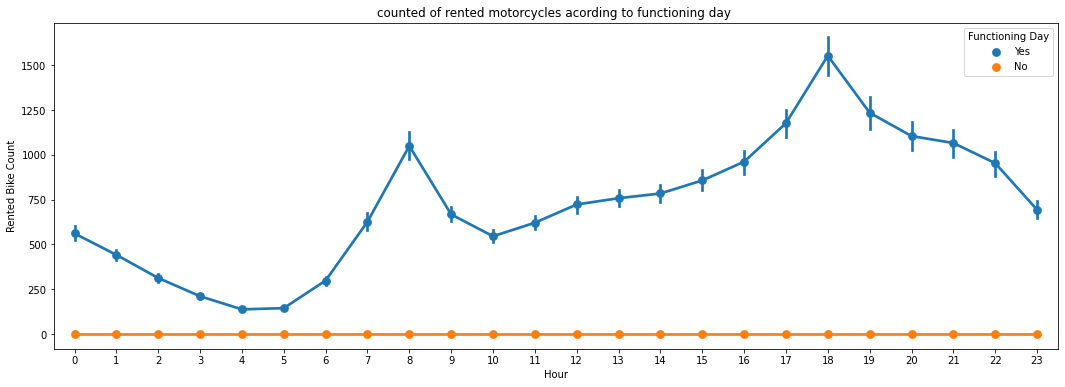

In [29]:
# plotting the graph
fig,ax=plt.subplots(figsize=(18,6))
sns.pointplot(data= df,x='Hour',y='Rented Bike Count',hue='Functioning Day',ax=ax)
ax.set(title='counted of rented motorcycles acording to functioning day ')

In [30]:
numerical =list(df.select_dtypes(['int64','float64']).columns)
numerical=pd.Index(numerical)
numerical

Index(['Rented Bike Count', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'month',
       'weekdays_weekend'],
      dtype='object')

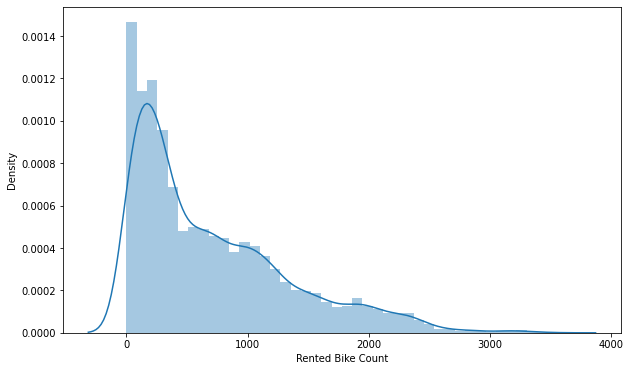

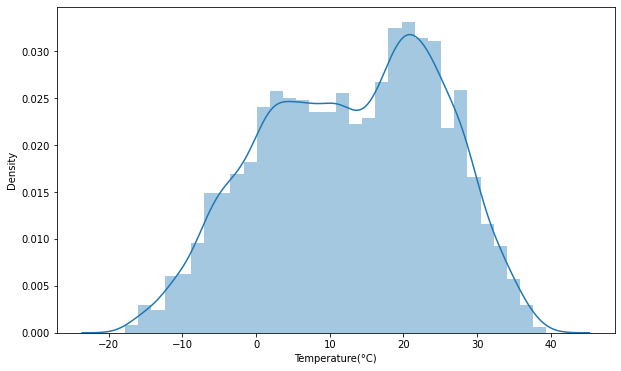

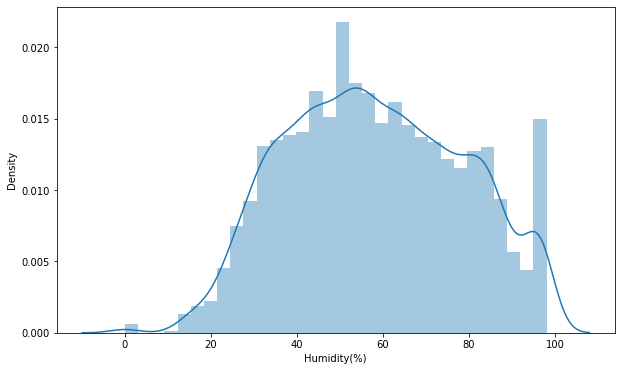

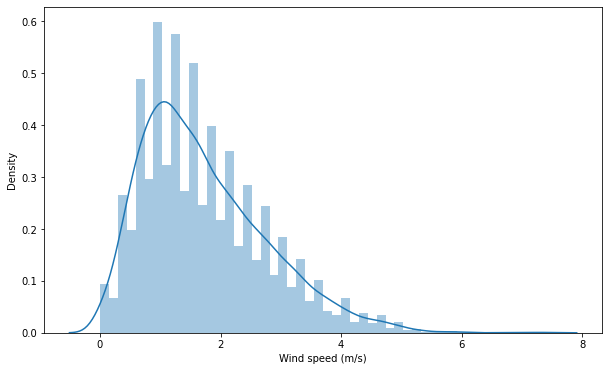

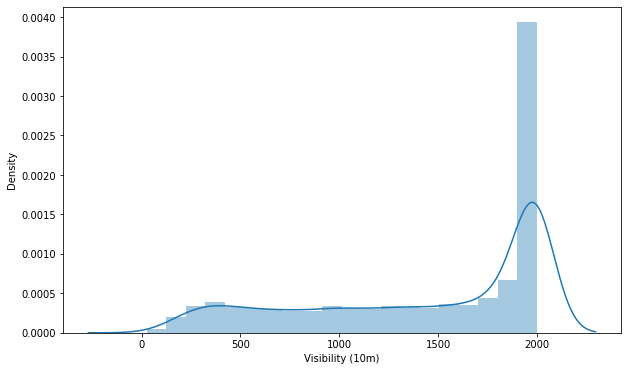

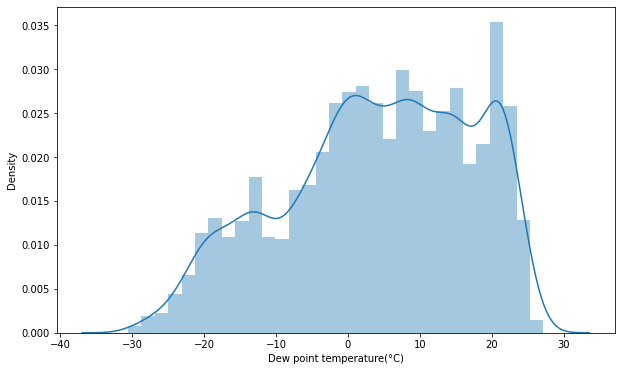

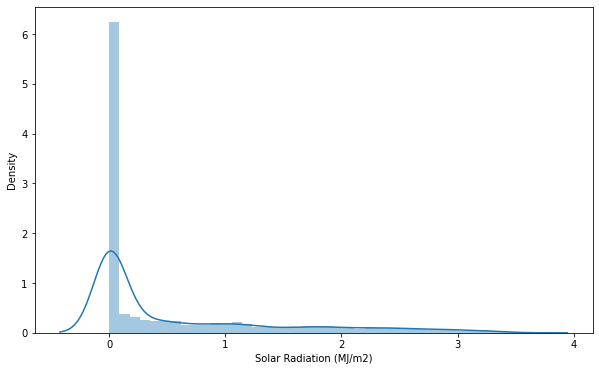

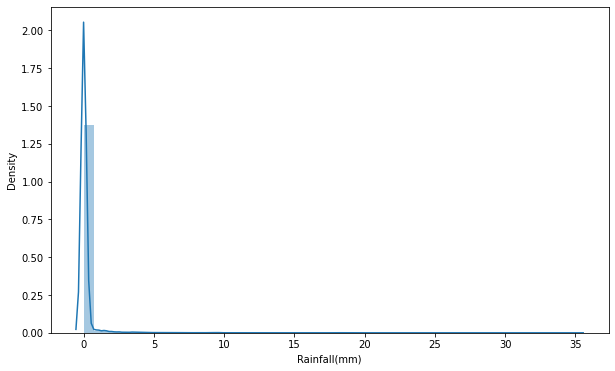

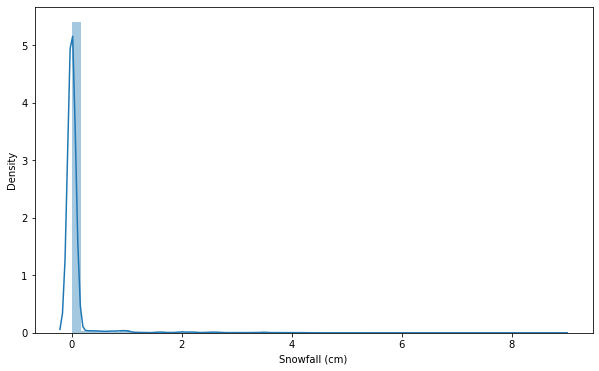

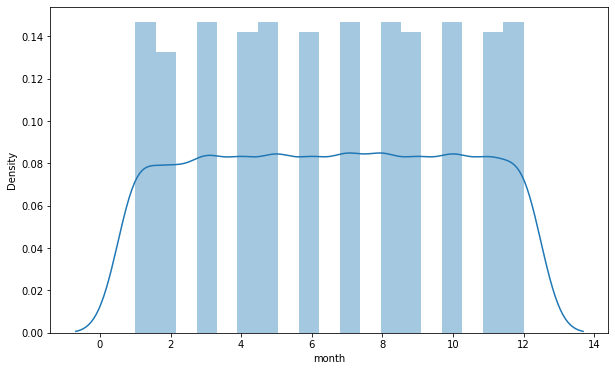

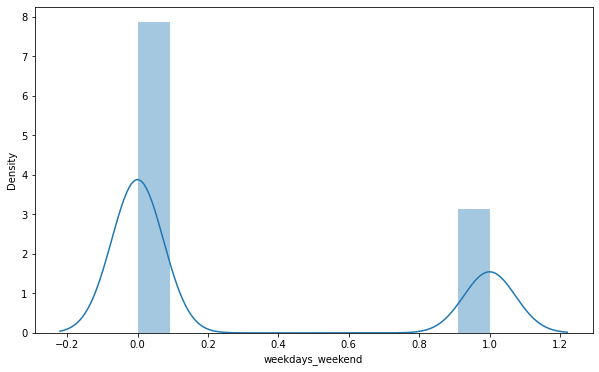

In [31]:
for col in numerical:
  plt.figure(figsize=(10,6))
  sns.distplot(x=df[col])
  plt.xlabel(col)
plt.show()

In [32]:
seoul_df.groupby('Temperature(°C)').mean()['Rented Bike Count']

Temperature(°C)
-17.8     322.0
-17.5     145.5
-17.4      64.0
-16.9      36.0
-16.5      96.0
          ...  
 38.0    1184.0
 38.7     475.0
 39.0    1033.0
 39.3     531.0
 39.4     561.0
Name: Rented Bike Count, Length: 546, dtype: float64

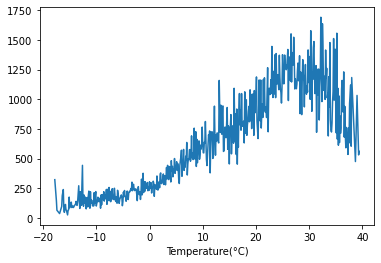

In [33]:
seoul_df.groupby('Temperature(°C)').mean()['Rented Bike Count'].plot()

In [34]:
rr = seoul_df.groupby('Rainfall(mm)').mean()['Rented Bike Count']
rr

Rainfall(mm)
0.0     739.311103
0.1     329.978261
0.2     185.300000
0.3     155.666667
0.4     134.187500
           ...    
21.0     19.000000
21.5    596.000000
24.0     61.000000
29.5    122.000000
35.0    151.000000
Name: Rented Bike Count, Length: 61, dtype: float64

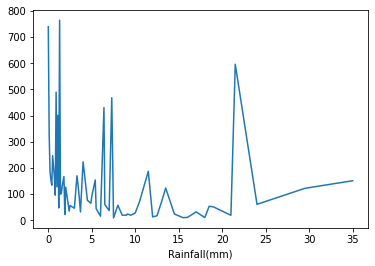

In [35]:
rr = seoul_df.groupby('Rainfall(mm)').mean()['Rented Bike Count'].plot()
rr

In [36]:
dr = seoul_df.groupby('Dew point temperature(°C)').mean()['Rented Bike Count']
dr

Dew point temperature(°C)
-30.6      90.000000
-30.5     192.000000
-29.8     364.000000
-29.7      71.000000
-29.6      78.000000
            ...     
 26.1     932.333333
 26.3     468.000000
 26.6     309.000000
 26.8     761.000000
 27.2    1117.000000
Name: Rented Bike Count, Length: 556, dtype: float64

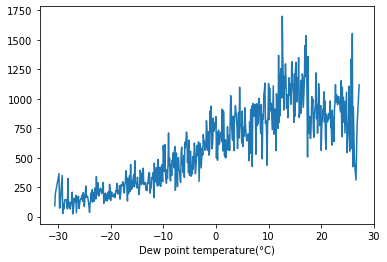

In [37]:
dr = seoul_df.groupby('Dew point temperature(°C)').mean()['Rented Bike Count'].plot()
dr

In [38]:
sr = seoul_df.groupby('Solar Radiation (MJ/m2)').mean()['Rented Bike Count']
sr

Solar Radiation (MJ/m2)
0.00     487.064884
0.01     785.007812
0.02     800.524390
0.03     843.927536
0.04     766.361702
           ...     
3.42    1272.250000
3.44    1216.000000
3.45     652.000000
3.49    1456.000000
3.52    1516.000000
Name: Rented Bike Count, Length: 345, dtype: float64

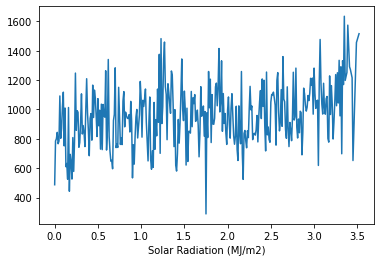

In [39]:
sr = seoul_df.groupby('Solar Radiation (MJ/m2)').mean()['Rented Bike Count'].plot()
sr

In [40]:
wf = seoul_df.groupby('Wind speed (m/s)').mean()['Rented Bike Count']
wf

Wind speed (m/s)
0.0     448.027027
0.1     591.040816
0.2     498.011628
0.3     454.867089
0.4     470.731183
          ...     
6.7     146.000000
6.9      49.000000
7.2    1805.000000
7.3     133.000000
7.4     913.000000
Name: Rented Bike Count, Length: 65, dtype: float64

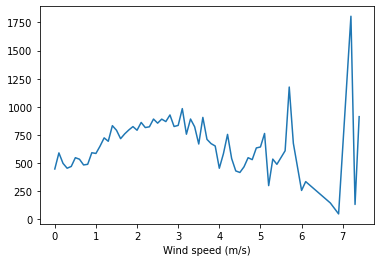

In [41]:
wf = df.groupby('Wind speed (m/s)').mean()['Rented Bike Count'].plot()
wf

In [42]:
sf = seoul_df.groupby('Snowfall (cm)').mean()['Rented Bike Count']
sf

Snowfall (cm)
0.0    732.272935
0.1    102.500000
0.2    242.866667
0.3    197.714286
0.4    284.809524
0.5    138.705882
0.6    185.000000
0.7    164.774194
0.8    256.000000
0.9    142.764706
1.0    163.000000
1.1    366.000000
1.2     54.375000
1.3    273.000000
1.4    214.500000
1.5    168.000000
1.6    198.473684
1.7    251.333333
1.8    310.200000
1.9    234.333333
2.0    190.500000
2.1    182.000000
2.2    211.833333
2.3    299.000000
2.4    264.000000
2.5    198.000000
2.6    108.583333
2.7    168.166667
2.8    177.500000
2.9    327.500000
3.0    233.800000
3.1    119.000000
3.2    256.750000
3.3    280.333333
3.4    183.500000
3.5    132.571429
3.6    436.000000
3.7    263.000000
3.8     92.000000
3.9     47.000000
4.0     40.000000
4.1    114.750000
4.2    116.000000
4.3     25.000000
4.8     40.000000
5.0    187.000000
5.1     62.000000
6.0    241.000000
7.0    167.000000
7.1     24.000000
8.8     88.000000
Name: Rented Bike Count, dtype: float64

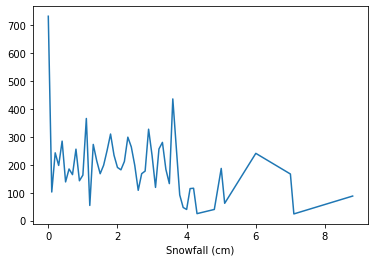

In [43]:
sf = seoul_df.groupby('Snowfall (cm)').mean()['Rented Bike Count'].plot()
sf

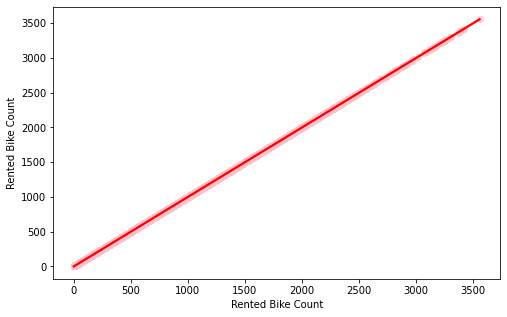

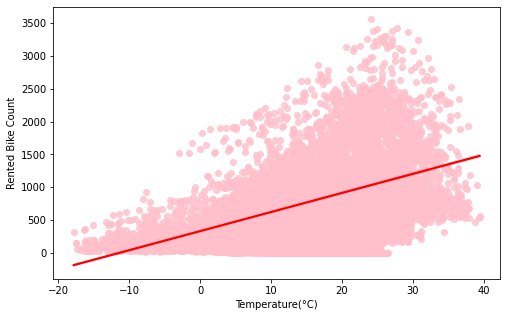

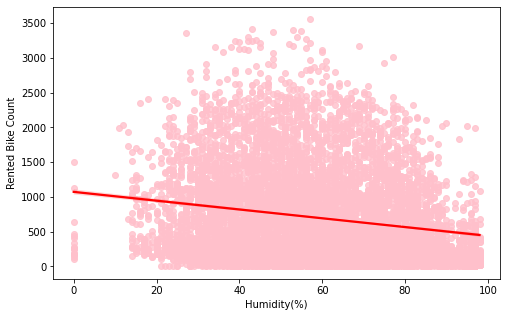

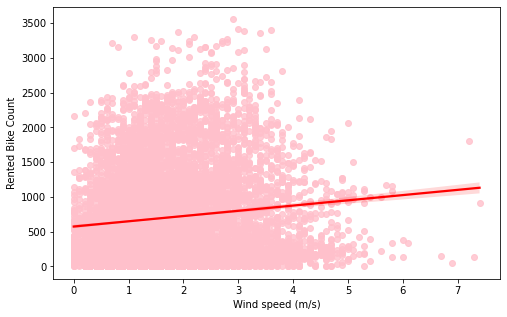

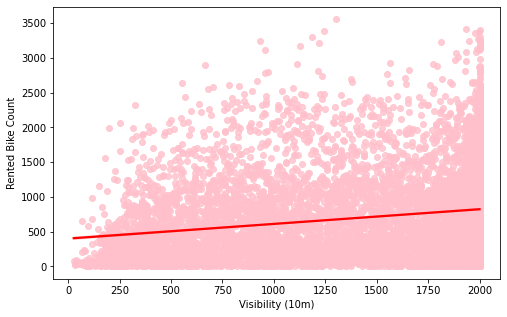

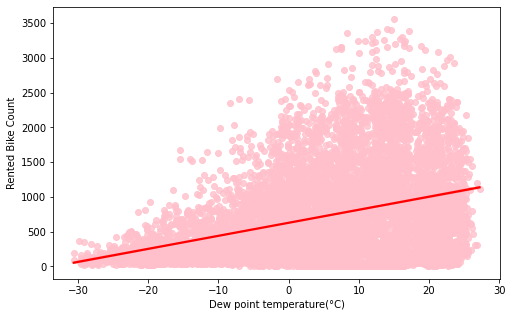

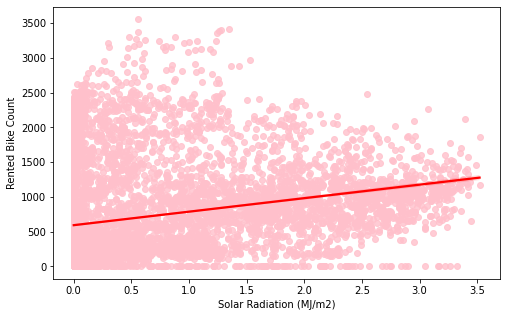

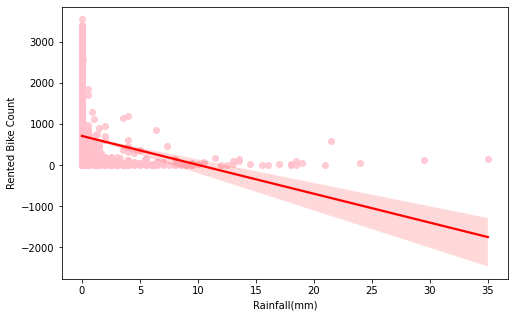

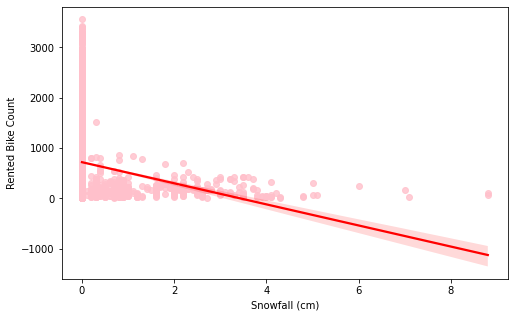

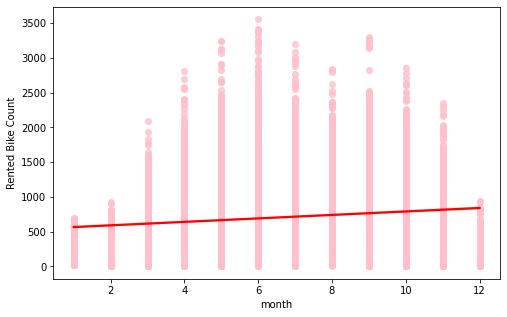

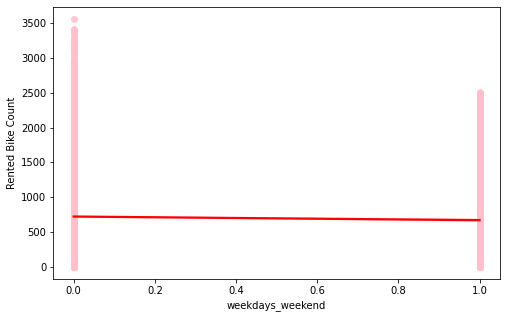

In [44]:
for col in numerical:
  fig,ax=plt.subplots(figsize=(8,5))
  sns.regplot(x=df[col],y=df['Rented Bike Count'],scatter_kws={"color": 'pink'}, line_kws={"color": "red"})

In [45]:
numerical_features = seoul_df.describe().columns
numerical_features

Index(['Rented Bike Count', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'year',
       'month', 'weekdays_weekend'],
      dtype='object')

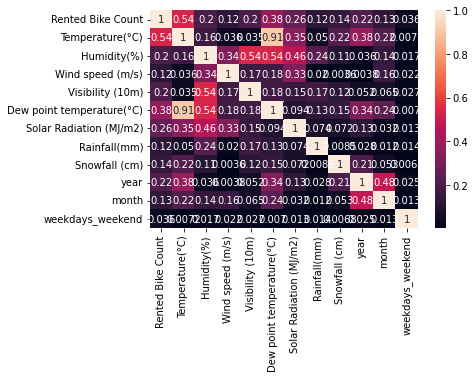

In [46]:
mc = sns.heatmap(abs(seoul_df[numerical_features].corr()), annot = True)

Inference:
We can see a high correlation between Temperature and Dew point temperature with a value of 0.91.
We can drop either of the two but since Temperature has more correlation with Rented Bike Count in comparison to Dew point temperature. So we will drop the Dew point temperature feature.

In [47]:
# Checking multicollinearity by calculating VIF
def calculate_vif(df):
    vif = pd.DataFrame()
    vif["independent_variables"] = df.columns
    vif["VIF"] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    return vif

In [48]:
calculate_vif(seoul_df[[i for i in numerical_features if i not in ['Rented Bike Count']]])

,independent_variables,VIF
0,Temperature(°C),188.473856
1,Humidity(%),187.172795
2,Wind speed (m/s),4.602829
3,Visibility (10m),10.457711
4,Dew point temperature(°C),127.278103
5,Solar Radiation (MJ/m2),2.834175
6,Rainfall(mm),1.100891
7,Snowfall (cm),1.137681
8,year,396.190059
9,month,5.102552


In [49]:
calculate_vif(seoul_df[[i for i in numerical_features if i not in ['Rented Bike Count', 'Dew point temperature']]])

,independent_variables,VIF
0,Temperature(°C),188.473856
1,Humidity(%),187.172795
2,Wind speed (m/s),4.602829
3,Visibility (10m),10.457711
4,Dew point temperature(°C),127.278103
5,Solar Radiation (MJ/m2),2.834175
6,Rainfall(mm),1.100891
7,Snowfall (cm),1.137681
8,year,396.190059
9,month,5.102552


Inference:
After removing Dew point temperature we can see that the VIF values for all the features are less than 5 which means they are not much correlated with each other (moderately correlated). Hence we are good to go.

In [50]:
X = seoul_df[[ 'Temperature(°C)','Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)','Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)']]
Y = seoul_df['Rented Bike Count']
seoul_df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,year,month,day,weekdays_weekend
0,2017-12-01,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,12,Friday,0
1,2017-12-01,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,12,Friday,0
2,2017-12-01,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,12,Friday,0
3,2017-12-01,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,12,Friday,0
4,2017-12-01,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,12,Friday,0


In [51]:
X = sm.add_constant(X)
X

,const,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
0,1.0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0
1,1.0,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0
2,1.0,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0
3,1.0,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0
4,1.0,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
8755,1.0,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0
8756,1.0,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0
8757,1.0,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0
8758,1.0,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0


In [52]:
model= sm.OLS(Y, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      Rented Bike Count   R-squared:                       0.398
Model:                            OLS   Adj. R-squared:                  0.397
Method:                 Least Squares   F-statistic:                     723.1
Date:                Wed, 05 Oct 2022   Prob (F-statistic):               0.00
Time:                        17:49:37   Log-Likelihood:                -66877.
No. Observations:                8760   AIC:                         1.338e+05
Df Residuals:                    8751   BIC:                         1.338e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                       844.6495    106.296      7.946      0.000     636.285    1053.014
Temperature(°C)              36.5270      4.169      8.762      0.000      28.355      44.699
Humidity(%)                 -10.5077      1.184     -8.872      0.000     -12.829      -8.186
Wind speed (m/s)             52.4810      5.661      9.271      0.000      41.385      63.577
Visibility (10m)             -0.0097      0.011     -0.886      0.376      -0.031       0.012
Dew point temperature(°C)    -0.7829      4.402     -0.178      0.859      -9.411       7.846
Solar Radiation (MJ/m2)    -118.9772      8.670    -13.724      0.000    -135.971    -101.983
Rainfall(mm)                -50.7083      4.932    -10.282      0.000     -60.376     -41.041
Snowfall (cm)                41.0307     12.806      3.204      0.001      15.929      66.133
==============================================================================
Omnibus:                      957.371   Durbin-Watson:                   0.338
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1591.019
Skew:                           0.769   Prob(JB):                         0.00
Kurtosis:                       4.412   Cond. No.                     3.11e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.11e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [53]:
categorical_features=list(seoul_df.select_dtypes(['object','category']).columns)
categorical_features=pd.Index(categorical_features)
categorical_features

Index(['Hour', 'Seasons', 'Holiday', 'Functioning Day', 'day'], dtype='object')

In [54]:
categoricalfeatures=list(seoul_df.select_dtypes(['object','category']).columns)
categoricalfeatures=pd.Index(categoricalfeatures)
categoricalfeatures

Index(['Hour', 'Seasons', 'Holiday', 'Functioning Day', 'day'], dtype='object')